# Credit Card Fraud Detection

## 1. Practical Motivation and Problem Formulation

### 1.1 Motivation
Credit card fraud is a major concern for various stakeholders such as banks and customers, especially in today's digital age. Though the rise in digital payment channels has allowed individuals to carry out transactions conveniently, it has also increased the number of fraudulent transactions, with credit card fraud attempts increasing by 46% year-on-year. This can cause substantial financial losses for both institutions and individuals, with global financial losses projected to reach $43 billion by 2026, according to the Nilson Report. 

Singapore, known for its vibrant economy and technological advancements, has also unfortunately experienced a significant surge in credit card fraud cases in recent years. The Singapore Police Force, in its annual report, revealed that a staggering 2,782 cases of credit card fraud were reported in 2020 alone, resulting in a collective loss of over SGD 16 million.

### 1.2 Problem Statement
Hence, our group has decided to tackle the prevalent issue of credit card frauds. Our problem statement is to enhance credit card fraud detection by developing reliable and accurate fraudulent transaction detection mechanisms using Classification and Machine Learning algorithms to minimise financial losses for financial institutions and individuals.

Our model will be trained with past credit card transactions that were fraudulent and will incorporate various factors into consideration, such as the age group, gender, purchase categories and transaction times. This allows institutions to proactively monitor transactions and spot patterns that fraudsters are preying on, minimising the risk of financial losses and reducing time and resources needed to solve fraudulent transactions.


### 1.3 Problem Definition – Defining Credit Card Frauds
Credit card frauds involve unauthorised transactions made using someone else's credit card or credit card details. 

Fraudsters use a variety of methods to obtain credit card information, which include:
- Database hacking
- Phishing scams
- Skimming devices (duplicating of information located on the magnetic strip of the card)
- Stealing of physical credit cards
- Fraudulent telemarketing

### 1.4 Possible Guiding Questions
- How large is the imbalance in the dataset? 
- Is there a time period when fraud transactions happen more commonly?
- Is there a certain transaction amount that seems ridiculously high which can indicate whether a transaction is fraudulent?
- Are there any missing values in any of the columns that are more common in fraudulent transactions?
- What variables should be examined?

### 1.5 Sample collection
Dataset: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

This dataset offers a variety of attributes valuable for comprehensive analysis. It contains 555,719 instances and 22 attributes, a mix of categorical and numerical data types. Importantly, the dataset is complete with no null values.

### 1.6 Variables Examined
Trans_date_trans_time: Timestamp of the transaction (date and time).
Cc_num:Unique customer identification number.
MerchantThe merchant involved in the transaction.
Category Transaction type (e.g., personal, childcare).
Amt:Transaction amount.
First: Cardholder's first name.
Last Cardholder's last name.
Gender: Cardholder's gender.
Street: Cardholder's street address.
City: Cardholder's city of residence.
State: Cardholder's state of residence.
Zip: Cardholder's zip code.
Lat:Latitude of cardholder's location.
Long: Longitude of cardholder's location.
City_pop:Population of the cardholder's city.
Job:Cardholder's job title.
Dob: Cardholder's date of birth.
Trans_num: Unique transaction identifier.
Unix_time: Transaction timestamp (Unix format).
Merch_lat:Merchant's location (latitude).
Merch_long: Merchant's location (longitude).
Is_fraud:Fraudulent transaction indicator (1 = fraud, 0 = legitimate).



## 2. Sample Collection

### 2.1 Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

Raw data is first accessed using the available dataset on Kaggle.
https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

### 2.2 Importing Libraries and the Data Set
We then imported the essential libraries needed for our analysis and the dataset for Credit Card Frauds from "fraud test.csv"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
sb.set()

In [ ]:
data=pd.read_csv("fraud test.csv")

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### 2.3 Exploring the Dataset

**2.Check the variables (and their types) in the dataset**
We analysed the different variable available in the dataset and examined their data types to decide if Feature Engineering is necessary for certain variables as our aim is to convert raw observations and correlations between variables to form desired features.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

From `data.info()`, we can see that there are 555,719 entries.

**2.3.2 Check the vital statistics of the dataset** 
We also checked the vital statistics of the dataset.

In [ ]:
data.shape

(555719, 23)

**2.3.3 Check for Unique Values**
We will implement `data.nunqiue()` to check for the unique values of each variable.

In [ ]:
data.nunique()

Unnamed: 0               555719
trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

**2.3.4 Check for Null values**

`data.isnull().sum()` is also used to check if there are any null values that needs correction.

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Since the results are 0 for all the variables, it implies that there are **no** missing values to correct.

**2.3.5 Checking for Duplicates**
We then proceed to check if there are duplicate rows that needs removal.

In [ ]:
duplicate = data[data.duplicated()]
print("Duplicate Rows : ")
duplicate

Duplicate Rows : 


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


Since there are no duplicate rows, **no** removal is needed.

### 2.4 Examining the Relationship Between Different Variables and Fraudulent Transactions

**2.4.1 Determining Number of Frauds**
We will first determine the total number of fradulent transactions out of all the transactions available in the dataset.

In [ ]:
data['is_fraud'].value_counts()


0    553574
1      2145
Name: is_fraud, dtype: int64

After executing the code, we can see that there are 2145 fraudulent transactions out of a total of 553,574 transactions. Below is a bar graph visualising the above results.

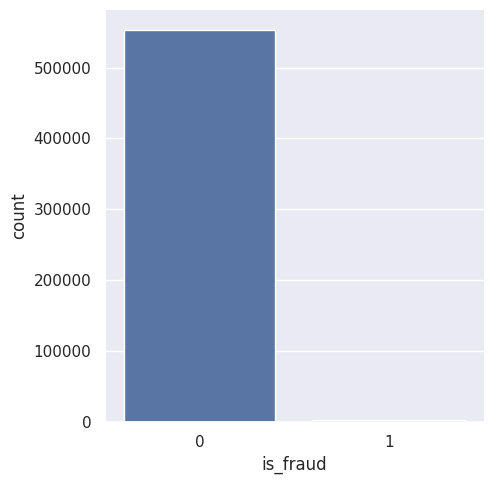

In [ ]:
sb.catplot(x = "is_fraud", data = data, kind = "count")

**2.4.2 Gender and Fradulent and Non-Fradulent Transactions**
Next, we will explore the relationship between the different transactions and gender.

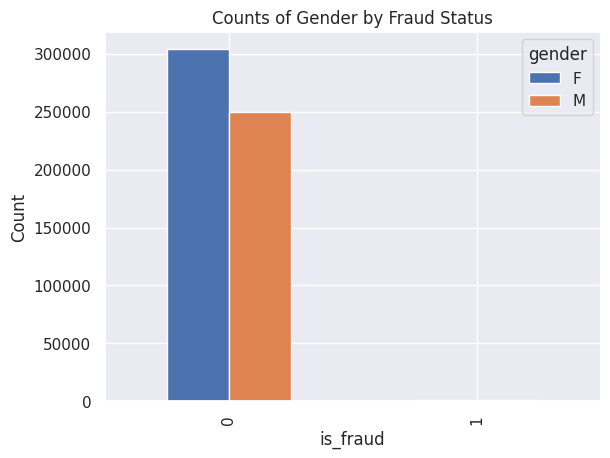

Counts of Gender by Fraud Status:
gender         F       M
is_fraud                
0         303722  249852
1           1164     981


In [ ]:
# Grouping the 'gender' column counts by 'is_fraud'
grouped_counts = data.groupby(['is_fraud', 'gender']).size()

# Reshaping the data for plotting
reshaped_counts = grouped_counts.unstack()

# Plotting the bar chart
reshaped_counts.plot(kind='bar')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Counts of Gender by Fraud Status')
plt.show()

reshaped_counts = grouped_counts.unstack()

# Printing out the counts
print("Counts of Gender by Fraud Status:")
print(reshaped_counts)

The bar graphs above illustrate the proportions of females and males involved in fraudulent and non-fradulent transactions. It can be seen that a greater number of females are invovled in both fradulent and non-fraudulent transactions, as compared to males.

**Frequency of Gender and Fraudulent Transactions**

Here, we implement the following codes to examine the proportion of different genders involved in **fraudulent transactions only**.

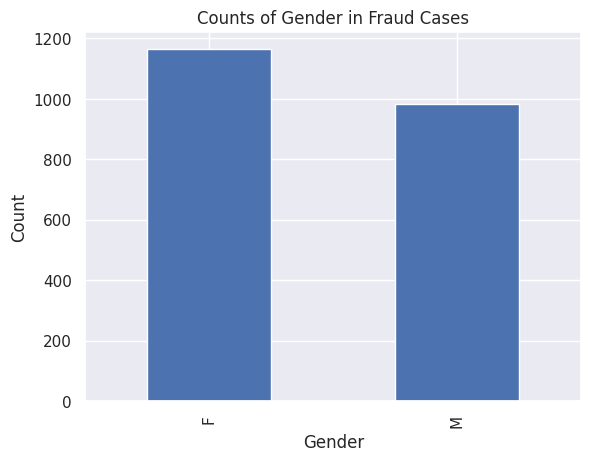

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the relevant columns 'is_fraud' and 'gender'

# Grouping the 'gender' column counts by 'is_fraud'
grouped_counts = data.groupby(['is_fraud', 'gender']).size()

# Reshaping the data for plotting
reshaped_counts = grouped_counts.unstack()

# Plotting the bar chart for gender against fraud cases
reshaped_counts.loc[1].plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Gender in Fraud Cases')
plt.show()




Looking at the bar graphs, the data indicates a higher proportion of fraudulent transactions among females compared to males. However, this **observation might not accurately reflect** the true susceptibility of the different genders to fraudulent transactions as the dataset is uncleaned, with a larger number of females surveyed. 

To mitigate this bias, we will calculate the frequency and relative percentages of genders, as shown below.

**Percentage of Genders Involved in Fradulent Transactions**

<AxesSubplot: title={'center': 'Number of frauds by gender'}, xlabel='gender', ylabel='is_fraud'>

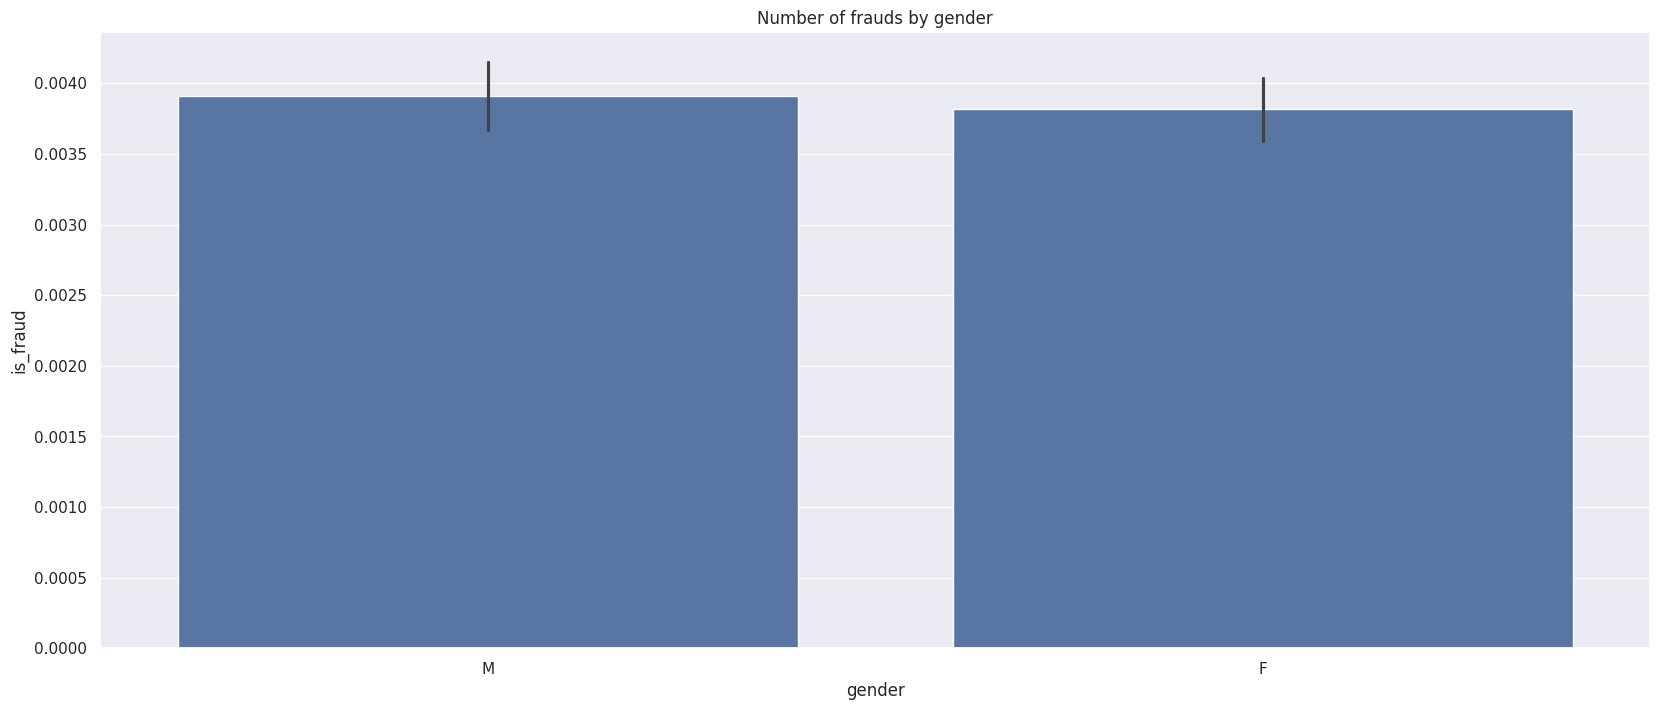

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by gender')
sb.barplot(x="gender", y='is_fraud' ,data=data)

Although the data is uncleaned and imbalanced, it can be seen that **Males take up a higher proportion** of individuals involved in fraudulent transactions.

**2.4.3 Number of Frauds By Category**
We will then analyse which transaction category constitutes the largest proportion of fraudulent transactions.

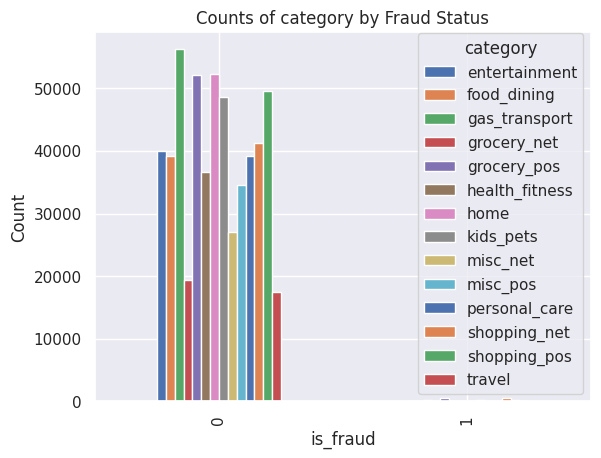

Counts of category by Fraud Status:
category  entertainment  food_dining  gas_transport  grocery_net  grocery_pos  \
is_fraud                                                                        
0                 40045        39214          56216        19385        52068   
1                    59           54            154           41          485   

category  health_fitness   home  kids_pets  misc_net  misc_pos  personal_care  \
is_fraud                                                                        
0                  36622  52278      48627     27100     34502          39257   
1                     52     67         65       267        72             70   

category  shopping_net  shopping_pos  travel  
is_fraud                                      
0                41273         49578   17409  
1                  506           213      40  


In [ ]:
# Grouping the 'category' column counts by 'is_fraud'
grouped_counts = data.groupby(['is_fraud', 'category']).size()

# Reshaping the data for plotting
reshaped_counts = grouped_counts.unstack()

# Plotting the bar chart
reshaped_counts.plot(kind='bar')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Counts of category by Fraud Status')
plt.show()

reshaped_counts = grouped_counts.unstack()

# Printing out the counts
print("Counts of category by Fraud Status:")
print(reshaped_counts)

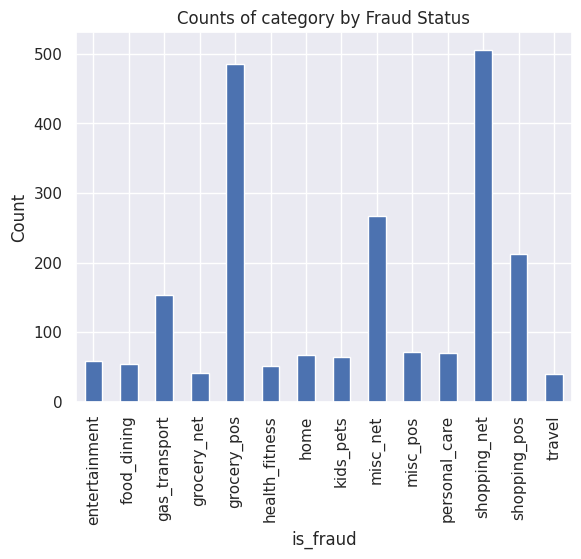

In [ ]:
# Grouping the 'category' column counts by 'is_fraud'
grouped_counts = data.groupby(['is_fraud', 'category']).size()

# Reshaping the data for plotting
reshaped_counts = grouped_counts.unstack()

# Plotting the bar chart
reshaped_counts.loc[1].plot(kind='bar')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Counts of category by Fraud Status')
plt.show()

From the above results, we can see that `shopping_net` makes up the greatest proportion of fraudulent transaction. This hightlights the need for individuals to be extra cautious when shopping online.

**2.4.4 Correlation Between the Different Variables and Fradulent Transactions**
Since 'Unnamed: 0' is just an index variable and not useful as a numeric data, we will drop it when we visualise the correlation plot.

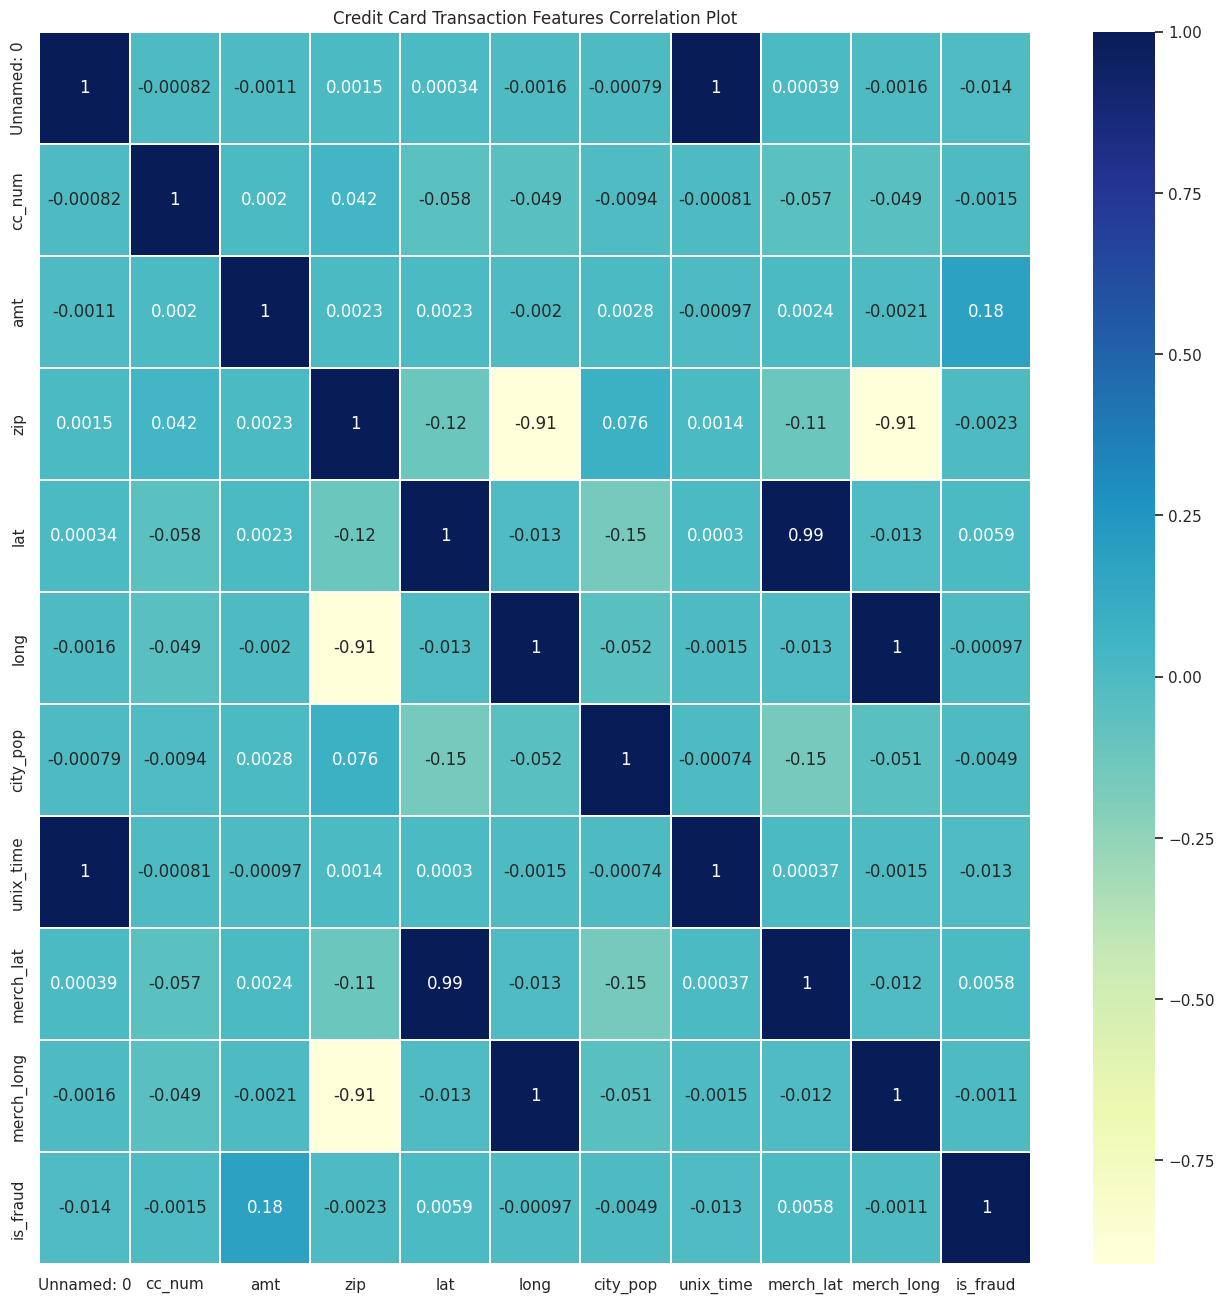

In [ ]:
# Identify non-numeric columns
non_numeric_columns = [col for col in data.columns if data[col].dtype == 'object']

# Drop non-numeric columns
data_numeric = data.drop(columns=non_numeric_columns)

fig, ax = plt.subplots(figsize=(16,16))
plt.title('Credit Card Transaction Features Correlation Plot')
sb.heatmap(data_numeric.corr(), annot=True, linewidths=.1, cmap="YlGnBu")
plt.show()

Based on the heatmap, we can see that the only relevant variable showing a stronger correlation to **`is_fraud`** is **`amt`**. Hence, it can be seen that the correlations between the variables from our raw data and fraudulent transactions are **relatively weak**, hinting that the model generated from our raw data will not be very accurate in detecting credit card frauds. Therefore, there is a need to for us to perform **feature engineering** to develop better variables to increase the accuracy and reliability of our model.

##  3. Data Cleaning

### 3.1 Feature Engineering
As noted in **2.4.4**, new features and variables have to be developed to increase the reliability and accuracy of our model. This can be done via feature engineering.

Feature Engineering is the process of selecting, manipulating and transforming raw data into features that can be used in supervised learning. We have thus implemented the following changes to the dataset.

> 1. We created a new variable, age from date-of-birth to the date of transaction.
> 2. We extracted the features relevant to credit card fraud only.
> 3. We undersampled the data to resolve the imbalanced data.
> 4. We categorised the time of purchasing into time categories with one-hour interval 
> 5. We performed one-hot encoding on `gender`, category of purchases (`category`) and time (`time_category`).
> 6. We cleaned the dataset to obtain a reliable gender ratio for fraudulent and non-fraudulent transactions.

**3.1.1 Converting date-of-birth to age**

We will make use of the date-of-birth of individuals,`dob`, available in the dataset, to generate their ages, a variable called `age`, to see whether age has has an influence on susceptibility to fradulent transactions.

In [ ]:
data['dob'] = data['dob'].str.strip("\n")

In [ ]:
data['dob'] = pd.to_datetime(data['dob'], format='%d/%m/%Y')

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
date_time = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
data['trans_date_trans_time']=date_time
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
data['age']= data['trans_date_trans_time'].dt.year- data['dob'].dt.year

**3.1.2 Data Extraction**
We drop out the unnecessary variables in the dataset and only include the category of objects, `gender`, `age`, amount of transaction (`amt`), transaction time and date (`trans_date_trans_time`), and whether the transaction is fraud (`is_fraud`).

In [ ]:
data=data[["category","gender","is_fraud","age","amt","trans_date_trans_time"]]

In [ ]:
data.head()

,category,gender,is_fraud,age,amt,trans_date_trans_time
0,personal_care,M,0,52,2.86,2020-06-21 12:14:00
1,personal_care,F,0,30,29.84,2020-06-21 12:14:00
2,health_fitness,F,0,50,41.28,2020-06-21 12:14:00
3,misc_pos,M,0,33,60.05,2020-06-21 12:15:00
4,travel,M,0,65,3.19,2020-06-21 12:15:00


**3.1.3 Data Balancing Using Undersampling**
Since our data is highly imbalanced, we decided to sample out the number of non-fraudulent transactions so that the value is the same as the fraudulent transactions. We are using undersample to reduce the data by eliminating examples belonging to the majority class to equalise the number of examples of each class.

We mainly chose undersmapling as it prevents the data from being overfitted, which may occur in other techniques such as SMOTE and Oversampling. 

In [ ]:
fraud=data[data.is_fraud==1]
not_fraud=data[data.is_fraud==0]

In [ ]:
not_fraud_sample=not_fraud.sample(n=2145)
cleaned_data=pd.concat([not_fraud_sample,fraud],axis=0)
cleaned_data.head()

,category,gender,is_fraud,age,amt,trans_date_trans_time
199199,kids_pets,M,0,67,75.33,2020-08-30 15:47:00
491396,personal_care,F,0,35,4.74,2020-12-17 18:45:00
307973,misc_net,F,0,36,53.29,2020-10-16 01:40:00
181867,misc_pos,F,0,33,44.76,2020-08-24 06:42:00
311876,shopping_pos,M,0,64,8.74,2020-10-18 02:46:00


0    2145
1    2145
Name: is_fraud, dtype: int64


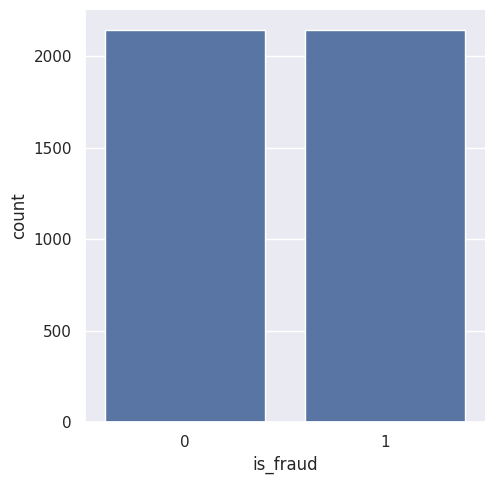

In [ ]:
print(cleaned_data["is_fraud"].value_counts())
sb.catplot(x = "is_fraud", data = cleaned_data, kind = "count")

The data for `is_fraud` will now be balanced.

**3.1.4 Categorising Transaction Timings into One-Hour Intervals**

We are categorising transaction timings into one-hour intervals (`time_category`) so that we can analyse during which period fraudulent transactions occur the most often.

In [ ]:
intervals = {
    '12am-1am': range(0, 1),
    '1am-2am': range(1, 2),
    '2am-3am': range(2, 3),
    '3am-4am': range(3, 4),
    '4am-5am': range(4,5),
    '5am-6am': range(5,6),
    '6am-7am': range(6,7),
    '7am-8am': range(7,8),
    '8am-9am': range(8,9),
    '9am-10am': range(9,10),
    '10am-11am': range(10,11),
    '11am-12pm': range(11,12),
    '12pm-1pm': range(12,13),
    '1pm-2pm': range(13,14),
    '2pm-3pm': range(14,15),
    '3pm-4pm': range(15,16),
    '4pm-5pm': range(16,17),
    '5pm-6pm': range(17,18),
    '6pm-7pm': range(18,19),
    '7pm-8pm': range(19,20),
    '8pm-9pm': range(20,21),
    '9pm-10pm': range(21,22),
    '10pm-11pm': range(22,23),
    '11pm-12am': range(23,24),
}

# Categorize time into intervals
def categorize_time(hour):
    for interval, hour_range in intervals.items():
        if hour in hour_range:
            return interval
    return 'Other'  # If the hour doesn't match any interval

# Apply categorization to the 'time' column
cleaned_data['time_category'] = cleaned_data['trans_date_trans_time'].dt.hour.apply(categorize_time)

cleaned_data.head()


,category,gender,is_fraud,age,amt,trans_date_trans_time,time_category
199199,kids_pets,M,0,67,75.33,2020-08-30 15:47:00,3pm-4pm
491396,personal_care,F,0,35,4.74,2020-12-17 18:45:00,6pm-7pm
307973,misc_net,F,0,36,53.29,2020-10-16 01:40:00,1am-2am
181867,misc_pos,F,0,33,44.76,2020-08-24 06:42:00,6am-7am
311876,shopping_pos,M,0,64,8.74,2020-10-18 02:46:00,2am-3am


**3.1.5 One-hot encoding**
 Machine learning algorithms typically require numerical inputs. One-hot encoding transforms categorical variables into a format that algorithms can understand and process and avoids introducing implicit ordering in categorical variables. For example, if we encode categorical variables using ordinal encoding (assigning integer values to categories), the algorithm may incorrectly interpret the numerical values as having a meaningful order, which may not be the case for categorical variables.
 
 **Gender:** Since the 'gender' variable has only two potential values, Male or Female, we can utilise One-hot Encoding. Following transformation, Male will be represented as 1 and Female as 0.

 **Category:** During exploratory data analysis (EDA) of the dataset, it was observed that the variable 'Category' contains 14 distinct values. Since the number of unique values is relatively small, one-hot encoding can be applied. One-hot encoding is necessary as 'Category' represents nominal data, which cannot be directly used in modeling and must be converted to numerical format.

**Time_category:** Use one-hot encoding to represent each hour interval as a binary variable. Each hour interval will have its own binary variable, where a value of 1 indicates that the observation occurred during that interval, and 0 otherwise.

 Thus, we will be performing one-hot encoding for the variables `category`, `gender`,`time_category`.

In [ ]:
data_encoded = pd.get_dummies(cleaned_data, columns=['category', 'gender','time_category'], dtype=int, drop_first=True)

In [ ]:
data_encoded=data_encoded.drop(columns=["trans_date_trans_time"])
data_encoded.head()

,is_fraud,age,amt,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,time_category_5am-6am,time_category_5pm-6pm,time_category_6am-7am,time_category_6pm-7pm,time_category_7am-8am,time_category_7pm-8pm,time_category_8am-9am,time_category_8pm-9pm,time_category_9am-10am,time_category_9pm-10pm
199199,0,67,75.33,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
491396,0,35,4.74,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
307973,0,36,53.29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181867,0,33,44.76,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
311876,0,64,8.74,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3.1.6 Gender Ratio for Cleaned Data**

In [ ]:
data_encoded["gender_M"].value_counts()

0    2296
1    1994
Name: gender_M, dtype: int64

After cleaning the dataset, we can see that there is a **greater proportion of females** involved in performing fraudulent transactions.

### 3.2 Correlation of Variables with Fraudulent Transactions

We will now examine the correlation of various factors and fraudulent transactions using the cleaned and balanced data set.

For categorical variables, we will first perform chi-squared test and hypothesis testing to gauge if there is a significant association between the different variables and fraudulent transactions before plotting the heatmaps and barplots to further examine the effects of the distinct and individuals categories on fraudulent transactions.

For numerical variables, we can directly plot the heatmap to get the correlation coefficient to examine the relationship between the variables and fraudulent transactions.

**3.2.1 Correlation of Category of Products With Fraudulent Transactions**


We will use the chi-squared test and hypothesis testing to see if the association between the category of products (`category`) and fraudulent transactions (`is_fraud`) is significant.

In [ ]:
import scipy.stats as stats

# Contingency table
contingency_table = pd.crosstab(cleaned_data['is_fraud'], cleaned_data['category'])

# Perform chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 751.5528866806904
p-value: 3.24820512315656e-152


With a chi-square statistic of 751.55 and an extremely low p-value (approximately 3.25e-152), there is strong evidence to reject the null hypothesis that there is no association between the 'category' and 'is_fraud' variables. This suggests a **significant association** between the two variables, indicating that certain categories may be more prone to fraudulent transactions than others.

Below is the distribution of product categories alongside the occurrence of fraudulent transactions.

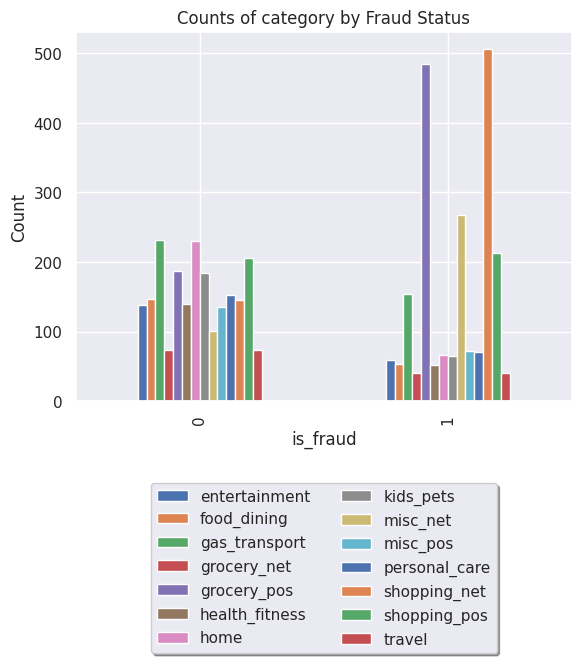

Counts of category by Fraud Status:
category  entertainment  food_dining  gas_transport  grocery_net  grocery_pos  \
is_fraud                                                                        
0                   138          147            232           73          187   
1                    59           54            154           41          485   

category  health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
is_fraud                                                                       
0                    139   230        184       101       136            153   
1                     52    67         65       267        72             70   

category  shopping_net  shopping_pos  travel  
is_fraud                                      
0                  146           206      73  
1                  506           213      40  


In [ ]:
# Grouping the 'category' column counts by 'is_fraud'
grouped_counts = cleaned_data.groupby(['is_fraud', 'category']).size()

# Reshaping the data for plotting
reshaped_counts = grouped_counts.unstack()

# Plotting the bar chart
ax = reshaped_counts.plot(kind='bar')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Counts of category by Fraud Status')

# Adjusting the legend position
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

plt.show()

# Printing out the counts
print("Counts of category by Fraud Status:")
print(reshaped_counts)

From the bar chart, it is clearly seen that some products have higher fraud cases. For instance, transactions involving online shopping (`shopping_net`) and grocery shopping (`grocery_pos`) show greater incidences of fradulent transactions, as compared to other variables. Hence, institutions can take these factors into consideration when mitigating credit card frauds. 

**3.2.2 Correlation between Time of Transaction in a Day and Fraudulent Transactions**


We willl use the chi-squared test and hypothesis testing to see if the association between the timing (`time_category`) and fraudulent transactions (`is_fraud`) is significant.

In [ ]:
# Contingency table
contingency_table = pd.crosstab(cleaned_data['is_fraud'], cleaned_data['time_category'])

# Perform chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 1693.8194640855882
p-value: 0.0


With a chi-square statistic of 1693.82 and a p-value of 0.0, there is strong evidence to reject the null hypothesis that there is no association between the timing of transactions and fraudulent activity. This suggests a **significant association** between time of transaction in a day (`time_category`) and fraudulent transactions (`is_fraud`).

The relationship can be further explored using the heatmap and barplots as shown below.

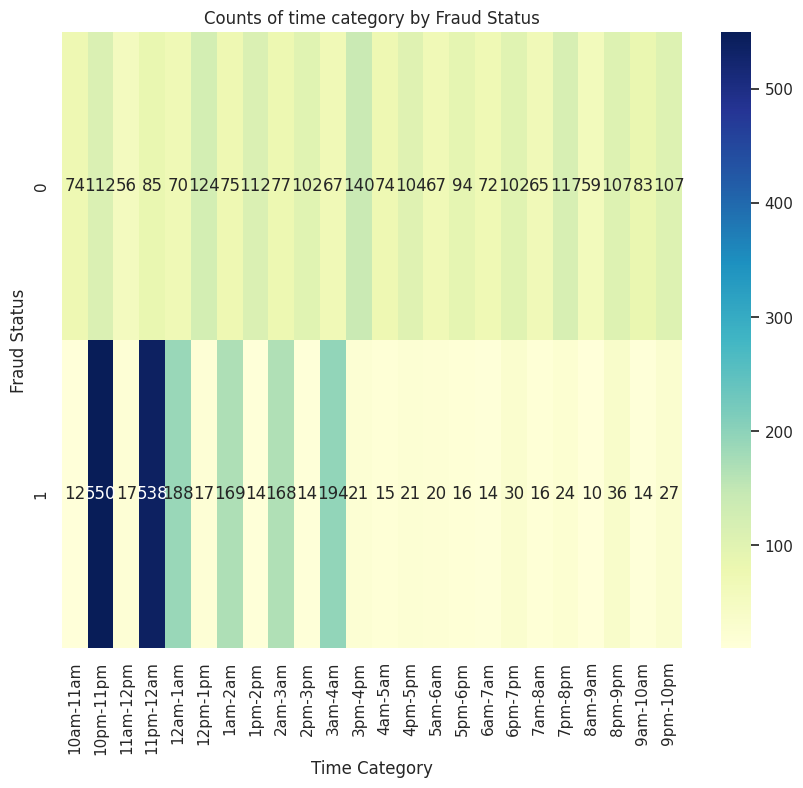

Counts of time category by Fraud Status:
time_category  10am-11am  10pm-11pm  11am-12pm  11pm-12am  12am-1am  12pm-1pm  \
is_fraud                                                                        
0                     74        112         56         85        70       124   
1                     12        550         17        538       188        17   

time_category  1am-2am  1pm-2pm  2am-3am  2pm-3pm  ...  5am-6am  5pm-6pm  \
is_fraud                                           ...                     
0                   75      112       77      102  ...       67       94   
1                  169       14      168       14  ...       20       16   

time_category  6am-7am  6pm-7pm  7am-8am  7pm-8pm  8am-9am  8pm-9pm  9am-10am  \
is_fraud                                                                        
0                   72      102       65      117       59      107        83   
1                   14       30       16       24       10       36        14   

time

In [ ]:
# Grouping the 'time category' column counts by 'is_fraud'
grouped_counts = cleaned_data.groupby(['is_fraud', 'time_category']).size()

# Reshaping the data for plotting
reshaped_counts = grouped_counts.unstack()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(reshaped_counts, annot=True, cmap="YlGnBu", fmt='d')  # annot=True to display counts, fmt='d' to format as integer
plt.xlabel('Time Category')
plt.ylabel('Fraud Status')
plt.title('Counts of time category by Fraud Status')

plt.show()

# Printing out the counts
print("Counts of time category by Fraud Status:")
print(reshaped_counts)


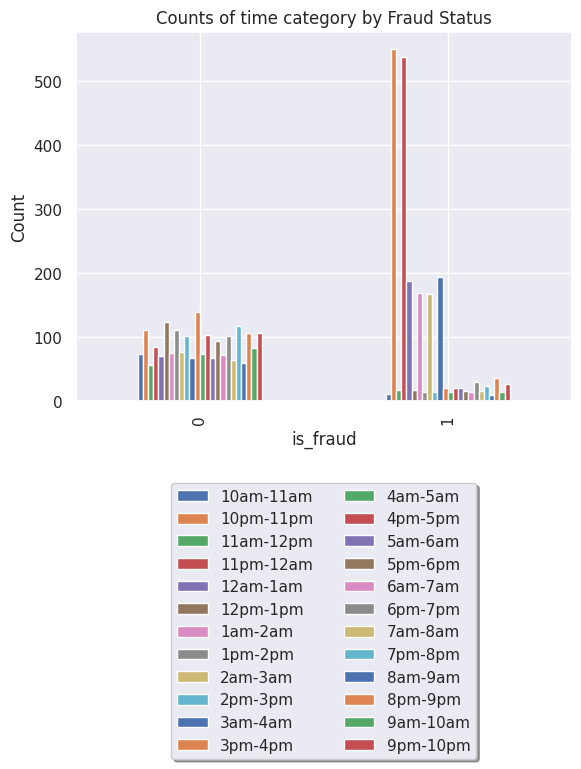

Counts of time category by Fraud Status:
time_category  10am-11am  10pm-11pm  11am-12pm  11pm-12am  12am-1am  12pm-1pm  \
is_fraud                                                                        
0                     74        112         56         85        70       124   
1                     12        550         17        538       188        17   

time_category  1am-2am  1pm-2pm  2am-3am  2pm-3pm  ...  5am-6am  5pm-6pm  \
is_fraud                                           ...                     
0                   75      112       77      102  ...       67       94   
1                  169       14      168       14  ...       20       16   

time_category  6am-7am  6pm-7pm  7am-8am  7pm-8pm  8am-9am  8pm-9pm  9am-10am  \
is_fraud                                                                        
0                   72      102       65      117       59      107        83   
1                   14       30       16       24       10       36        14   

time

In [ ]:
# Grouping the 'time category' column counts by 'is_fraud'
grouped_counts = cleaned_data.groupby(['is_fraud', 'time_category']).size()

# Reshaping the data for plotting
reshaped_counts = grouped_counts.unstack()

# Plotting the bar chart
ax = reshaped_counts.plot(kind='bar')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Counts of time category by Fraud Status')

# Adjusting the legend position
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

plt.show()

# Printing out the counts
print("Counts of time category by Fraud Status:")
print(reshaped_counts)


From the heatmap and bar chart, it can be seen that during certain timings in the day, there are more cases of fraudulent transactions, such as from 10pm to 12am, hinting that extra caution should be exercised during those periods.

**3.2.3 Correlation Between Transaction Amount and Fraudulent Transactions**


Here, we plot the heatmap for the numerical variable, transaction amount (`amt`) and fraudulent transactions (`is_fraud`) to examine their relationship.

          is_fraud       amt
is_fraud  1.000000  0.630957
amt       0.630957  1.000000


<AxesSubplot: >

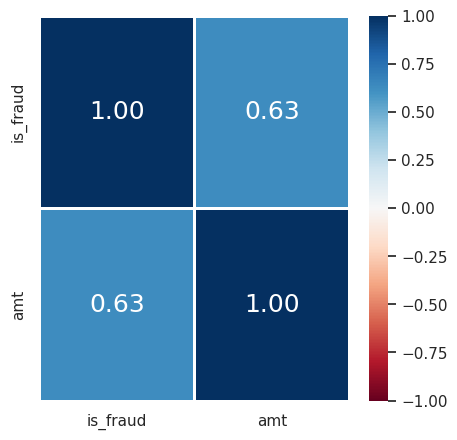

In [ ]:
correlation=cleaned_data[["is_fraud","amt"]]
# Correlation Matrix
print(correlation.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(5,5))
sb.heatmap(correlation.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Correlation coefficient of 0.63 suggests that there is a relatively strong relationship between the transaction amount (`amt`) and fraudulent transactions (`is_fraud`). The bar plot below shows the frequency of individuals getting scammed of different amounts.

<AxesSubplot: xlabel='amt', ylabel='Count'>

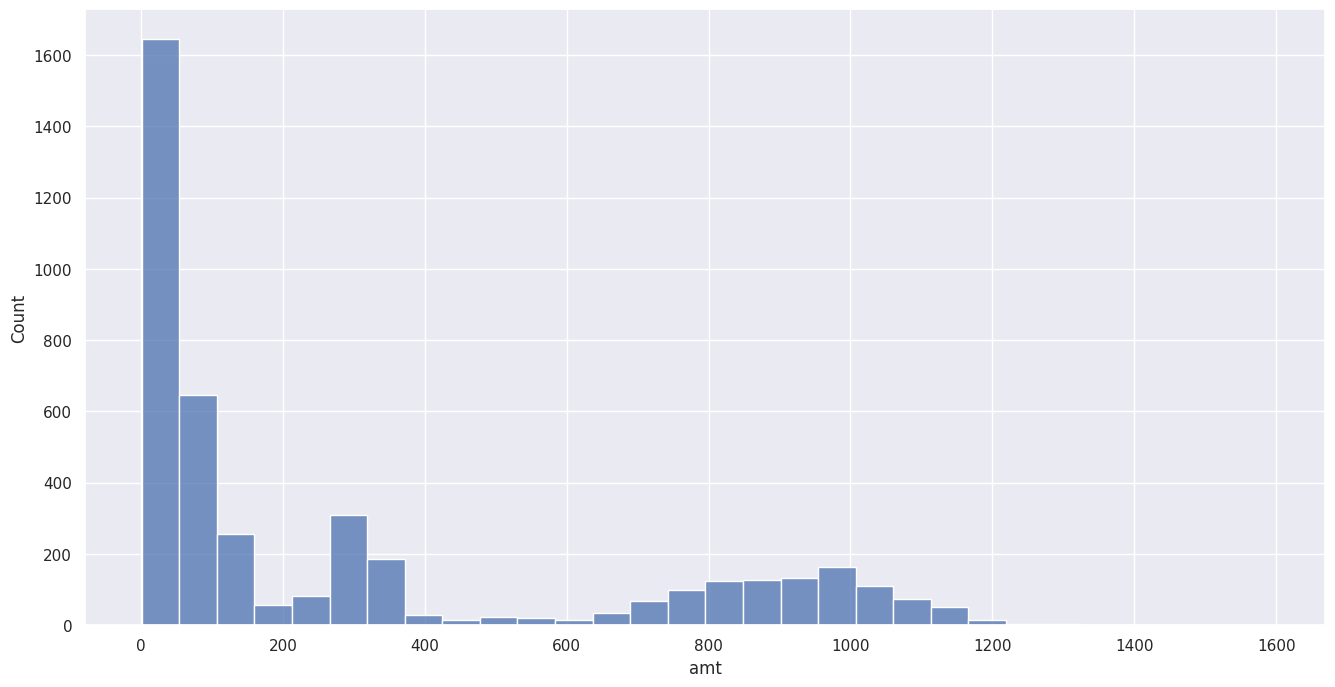

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = cleaned_data['amt'])

**3.2.4 Correlation Between Gender and Fraudulent Transactions**

For gender, we are comparing the proportions of fraudulent transactions for males and females separately using the cleaned dataset.



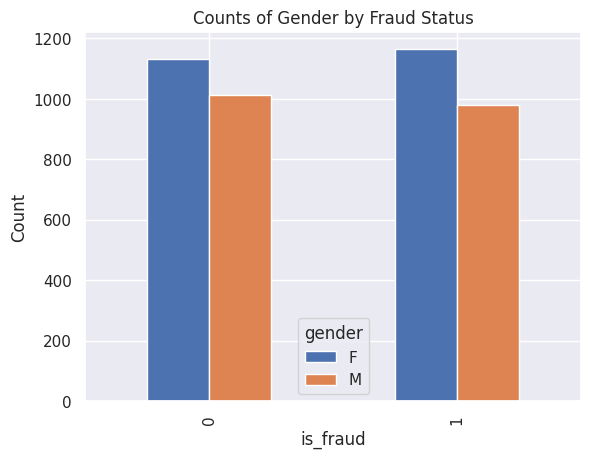

Counts of Gender by Fraud Status:
gender       F     M
is_fraud            
0         1132  1013
1         1164   981


In [ ]:
# Grouping the 'gender' column counts by 'is_fraud'
grouped_counts = cleaned_data.groupby(["is_fraud", "gender"]).size()

# Reshaping the data for plotting
reshaped_counts = grouped_counts.unstack()

# Plotting the bar chart
reshaped_counts.plot(kind='bar')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Counts of Gender by Fraud Status')
plt.show()

# Printing out the counts
print("Counts of Gender by Fraud Status:")
print(reshaped_counts)

Using the cleaned dataset, we can see that **females now take up a greater proportion** of fraudulent transactions.

**3.2.5 Correlation Between Age and Fraudulent Transactions**


We will now examine the relationship between age (`age`) and fraudulent transactions (`is_fraud`).

For age group, instead of performing the usual statistical tests such as chi-squared tests and hypothesis testing, we performed Mann-Whitney U Test. 

**Why the Mann-Whitney U Test?**
The Mann-Whitney U test is chosen as an appropriate statistical method for our analysis due to its robustness to violations of normality and its ability to handle non-normally distributed data. Unlike parametric tests, such as the t-test, the Mann-Whitney U test does not rely on assumptions about the underlying distribution of the data, making it well-suited for situations where normality cannot be assumed. 

Additionally, the Mann-Whitney U test is suitable for comparing the distributions of a continuous variable (age) between two independent groups (fraud and non-fraud) without requiring equal variances or sample sizes. Therefore, by using the Mann-Whitney U test, we can effectively assess whether there is a significant difference in the distribution of ages between fraudulent and non-fraudulent transactions, providing robust results despite the non-normality of our dataset.

In [ ]:
!pip install pingouin==0.5.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from scipy.stats import mannwhitneyu

# Separate age data for fraud and non-fraud groups
age_fraud = cleaned_data[cleaned_data['is_fraud'] == 1]['age']
age_non_fraud = cleaned_data[cleaned_data['is_fraud'] == 0]['age']

# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(age_fraud, age_non_fraud)

print("Mann-Whitney U Test U-statistic:", u_statistic)
print("p-value:", p_value)

Mann-Whitney U Test U-statistic: 2493018.5
p-value: 2.0656195581016276e-06


Based on the Mann-Whitney U test results, we observe a U-statistic of approximately 2483653.5 and a p-value of approximately 6.30e-06. 

The U-statistic reflects the rank-sum value obtained from comparing the ages between fraudulent and non-fraudulent transactions. A higher U-statistic indicates a greater difference in ranks between the two groups, suggesting a significant distinction in age distributions.

The p-value, which is extremely small (6.30e-06), indicates strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there is a significant difference in age distributions between fraudulent and non-fraudulent transactions. In other words, the **ages of individuals involved in fraudulent transactions tend to differ significantly from those involved in non-fraudulent transactions**.

We will then examine how one's age influences the susceptibility of individuals to fraudulent transactions as shown below.

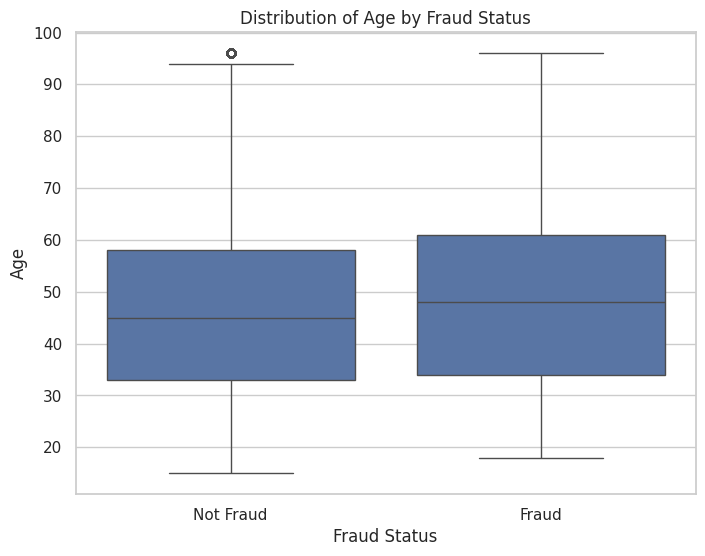

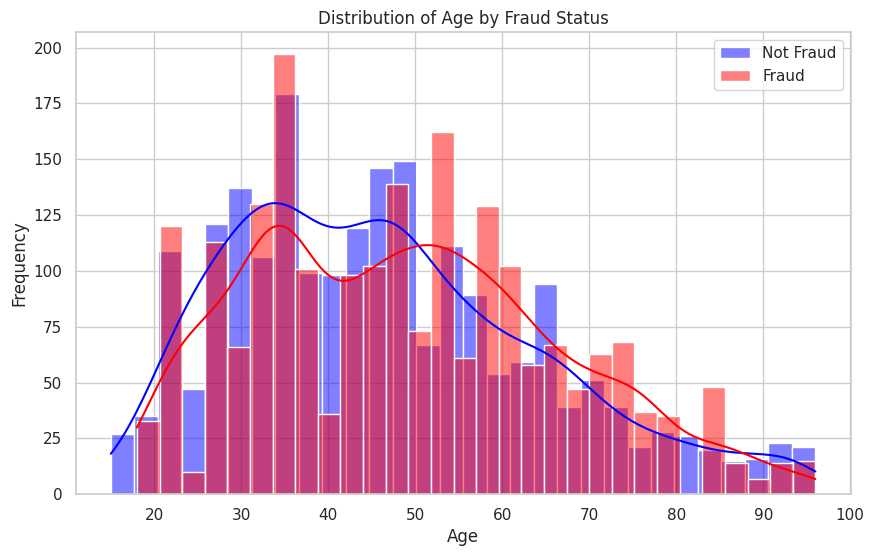

In [ ]:
# Set style for seaborn
sb.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x='is_fraud', y='age', data=data)
plt.title('Distribution of Age by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])  # Customize x-axis labels
plt.show()

# Create histograms for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sb.histplot(cleaned_data[cleaned_data['is_fraud'] == 0]['age'], color='blue', kde=True, label='Not Fraud', bins=30)
sb.histplot(cleaned_data[cleaned_data['is_fraud'] == 1]['age'], color='red', kde=True, label='Fraud', bins=30)
plt.title('Distribution of Age by Fraud Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Display frequency of age for each category of 'is_fraud'
age_frequency = cleaned_data.groupby('is_fraud')['age'].value_counts()
print("Frequency of Age by Fraud Status:")
print(age_frequency)

Frequency of Age by Fraud Status:
is_fraud  age
0         48     74
          36     68
          46     63
          23     62
          27     62
                 ..
1         88      7
          89      7
          91      7
          93      7
          96      7
Name: age, Length: 147, dtype: int64


In [ ]:
# Find the age with the highest frequency for each category of 'is_fraud'
highest_frequency_age = cleaned_data.groupby('is_fraud')['age'].value_counts().groupby('is_fraud').idxmax()

print("Age with the Highest Frequency by Fraud Status:")
print(highest_frequency_age)

Age with the Highest Frequency by Fraud Status:
is_fraud
0    (0, 48)
1    (1, 34)
Name: age, dtype: object


Based on the boxplot and histogram, we can see that the age distribution for fraudulent and non-fraudulent transactions is indeed different. 

We can see that age does play a role in increasing one's risk to fraudulent transactions, with people aged 34 years old being the most prone to fraudulent transactions. Hence, individuals of this age group should be more careful with their transactions.

### 3.3 Feature Selection
Hence, since we found that the variables from 3.2 can significantly influence individual's susceptibility to fraudulent transactions, we will be using them for the building of our fraudulent transaction detection mechanism. These variables are Category of Products (`category`), Time of Transaction (`time_category`), Transaction Amount (`amt`), Gender (`gender`) and Age (`age`).

### 3.4 Feature Scaling
There is a need for scaling as the dataset contains some variables with large range of values as compared to other variables such as `amt`. In order to prevent such variables dominating other variables, we perform scaling on the dataset.

We will be testing three scaling methods, robust scaling, MinMax scaling and standard scaling

**What is Robust Scaling?**
Robust scaling, also known as robust standardisation, is a method used to scale features by removing the median and scaling them according to the interquartile range (IQR). This is done using: 
x scaled = (x - median(x)) / IQR(x)

**What is MinMax Scaling?**
Min-Max scaling, also known as normalisation, rescales features to a fixed range—usually between 0 and 1. It is done using the following formula for each feature: 
x scaled = (x - min(x)) / (max(x)-min(x))

**What is Standard Scaling?**
Standard scaling, also known as Z-score normalisation, transforms features so that they have a mean of 0 and a standard deviation of 1. It's done using the following formula for each feature 
x scaled = (x - mean(x)) / standard deviation(x)

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
scaler = RobustScaler()
robust_df = scaler.fit_transform(data_encoded)
robust_df = pd.DataFrame(robust_df)
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(data_encoded)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(data_encoded)
minmax_df = pd.DataFrame(minmax_df)

<AxesSubplot: title={'center': 'After Min-Max Scaling'}, xlabel='0', ylabel='Density'>

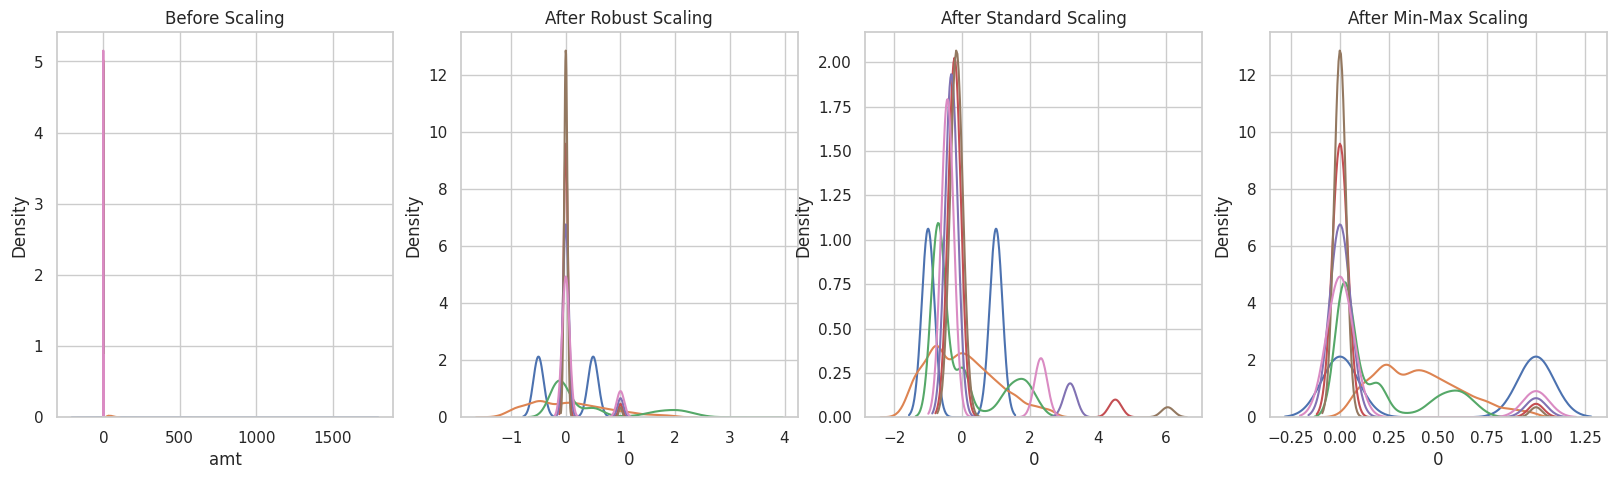

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sb.kdeplot(data_encoded['amt'], ax = ax1)
sb.kdeplot(data_encoded['age'], ax = ax1)
sb.kdeplot(data_encoded['category_grocery_pos'], ax = ax1)
sb.kdeplot(data_encoded['category_shopping_net'], ax = ax1)
sb.kdeplot(data_encoded['gender_M'], ax = ax1)
sb.kdeplot(data_encoded['time_category_10pm-11pm'], ax = ax1)
sb.kdeplot(data_encoded['time_category_11pm-12am'], ax = ax1)

ax2.set_title('After Robust Scaling')  
sb.kdeplot(robust_df[0], ax = ax2)
sb.kdeplot(robust_df[1], ax = ax2)
sb.kdeplot(robust_df[2], ax = ax2)
sb.kdeplot(robust_df[3], ax = ax2)
sb.kdeplot(robust_df[4], ax = ax2)
sb.kdeplot(robust_df[5], ax = ax2)
sb.kdeplot(robust_df[6], ax = ax2)


ax3.set_title('After Standard Scaling')  
sb.kdeplot(standard_df[0], ax = ax3)
sb.kdeplot(standard_df[1], ax = ax3)
sb.kdeplot(standard_df[2], ax = ax3)
sb.kdeplot(standard_df[3], ax = ax3)
sb.kdeplot(standard_df[4], ax = ax3)
sb.kdeplot(standard_df[5], ax = ax3)
sb.kdeplot(standard_df[6], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sb.kdeplot(minmax_df[0], ax = ax4)
sb.kdeplot(minmax_df[1], ax = ax4)
sb.kdeplot(minmax_df[2], ax = ax4)
sb.kdeplot(minmax_df[3], ax = ax4)
sb.kdeplot(minmax_df[4], ax = ax4)
sb.kdeplot(minmax_df[5], ax = ax4)
sb.kdeplot(minmax_df[6], ax = ax4)


**Why not MinMax Scaling and Robust Scaling?**
- **Insensitive to Ourliers:**  MinMax scaling and Robust scaling both normalise data based on the range of the data. However, they may not effectively handle outliers in the dataset. In credit card fraud detection, outliers could represent fraudulent transactions, and scaling techniques that are sensitive to outliers might distort the data and affect the model's ability to detect fraud accurately.

- **Loss of information:** MinMax scaling transforms the data to a fixed range (typically between 0 and 1), while Robust scaling scales the data based on percentiles. In both cases, some information about the original distribution of the data may be lost. This loss of information could potentially impact the model's ability to differentiate between normal and fraudulent transactions, especially if the fraud patterns differ significantly from normal transaction patterns.

**Why Standard Scaling?**
- **Compatibility with Algorithms:** Many machine learning algorithms assume that the input features are centered around zero with a standard deviation of 1. Standard scaling ensures that the data meet these assumptions, which can lead to better performance and convergence of the algorithms.

- **Preservation of Data Distribution:** Standard scaling transforms the data to have a mean of 0 and a standard deviation of 1. This transformation preserves the shape of the original distribution, unlike MinMax scaling, which compresses the data into a fixed range. Preserving the data distribution can be advantageous, especially when the underlying distribution is important for the analysis.

- **Robustness to Outliers:** Standard scaling is less sensitive to outliers compared to MinMax scaling. Outliers can significantly affect the mean and range of the data, but they have less impact on the standard deviation, making standard scaling more robust in the presence of outliers.

In the context of credit card fraud detection, having normally distributed numeric variables in our data is beneficial for several reasons. Normality simplifies the interpretation of statistical analyses and makes it easier to apply various machine learning algorithms that assume normality or perform better with normally distributed data.

Standard scaling, which centers the data around its mean and scales it to have unit variance, assumes the data to be normally distributed. By using standard scaling, we aim to transform our data into a standard form that adheres to this assumption. This can enhance the performance and interpretability of our models, allowing for more accurate detection of patterns and anomalies associated with fraudulent transactions.

In [ ]:
scaler = StandardScaler()


In [ ]:
from sklearn.model_selection import train_test_split
X = data_encoded.drop(columns='is_fraud')
y = data_encoded['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
trainnew = scaler.fit_transform(X_train)
testnew = scaler.fit_transform(X_test)



In [ ]:
X_train = pd.DataFrame(trainnew, columns=X_train.columns)
X_train.head()

,age,amt,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,...,time_category_5am-6am,time_category_5pm-6pm,time_category_6am-7am,time_category_6pm-7pm,time_category_7am-8am,time_category_7pm-8pm,time_category_8am-9am,time_category_8pm-9pm,time_category_9am-10am,time_category_9pm-10pm
0,-0.311736,-0.741445,-0.213572,-0.311748,-0.167549,2.315661,-0.216959,-0.273502,-0.248004,-0.302004,...,6.831301,-0.162221,-0.139098,-0.173749,-0.139098,-0.190347,-0.127451,-0.189405,-0.156732,-0.180744
1,-1.212958,-0.753968,-0.213572,-0.311748,-0.167549,-0.431842,4.609170,-0.273502,-0.248004,-0.302004,...,-0.146385,-0.162221,-0.139098,-0.173749,-0.139098,-0.190347,-0.127451,-0.189405,-0.156732,-0.180744
2,0.364180,1.263297,-0.213572,-0.311748,-0.167549,-0.431842,-0.216959,-0.273502,-0.248004,3.311215,...,-0.146385,-0.162221,-0.139098,-0.173749,-0.139098,-0.190347,-0.127451,-0.189405,-0.156732,-0.180744
3,0.364180,1.703033,-0.213572,-0.311748,-0.167549,-0.431842,-0.216959,-0.273502,-0.248004,3.311215,...,-0.146385,6.164414,-0.139098,-0.173749,-0.139098,-0.190347,-0.127451,-0.189405,-0.156732,-0.180744
4,-0.706021,-0.748741,-0.213572,-0.311748,-0.167549,-0.431842,-0.216959,-0.273502,-0.248004,-0.302004,...,-0.146385,-0.162221,-0.139098,-0.173749,-0.139098,5.253570,-0.127451,-0.189405,-0.156732,-0.180744


In [ ]:
X_test = pd.DataFrame(testnew, columns=X_test.columns)
X_test.head()

,age,amt,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,...,time_category_5am-6am,time_category_5pm-6pm,time_category_6am-7am,time_category_6pm-7pm,time_category_7am-8am,time_category_7pm-8pm,time_category_8am-9am,time_category_8pm-9pm,time_category_9am-10am,time_category_9pm-10pm
0,1.946438,-0.796873,-0.23983,-0.320668,-0.159681,-0.428944,-0.213287,-0.270914,-0.248759,-0.316228,...,-0.137849,-0.162221,-0.15183,-0.188144,-0.137849,-0.169638,-0.128793,-0.176777,-0.140747,-0.176777
1,-0.717320,-0.754509,-0.23983,-0.320668,-0.159681,-0.428944,4.688512,-0.270914,-0.248759,-0.316228,...,-0.137849,-0.162221,-0.15183,-0.188144,-0.137849,-0.169638,-0.128793,-0.176777,-0.140747,-0.176777
2,0.586221,-0.686124,-0.23983,3.118493,-0.159681,-0.428944,-0.213287,-0.270914,-0.248759,-0.316228,...,-0.137849,-0.162221,-0.15183,-0.188144,-0.137849,-0.169638,-0.128793,-0.176777,-0.140747,-0.176777
3,0.982951,1.926944,-0.23983,-0.320668,-0.159681,-0.428944,-0.213287,-0.270914,-0.248759,-0.316228,...,-0.137849,-0.162221,-0.15183,-0.188144,-0.137849,-0.169638,-0.128793,-0.176777,-0.140747,-0.176777
4,-0.093887,-0.704641,-0.23983,-0.320668,-0.159681,-0.428944,-0.213287,-0.270914,-0.248759,-0.316228,...,-0.137849,-0.162221,-0.15183,-0.188144,-0.137849,-0.169638,-0.128793,-0.176777,-0.140747,-0.176777


## 4. Development of Fraud Detection Mechanism

We will examine various models to see which is the best machine learning model in helping us to detect fraudulent credit card transactions.

The models that we have chosen are namely, Random Forest Classifier, Logistic Regression, Multi-layer Perceptron and K-Nearest Neighbours.

In [ ]:
# Importing the necessary stuff
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [ ]:
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

def get_TNR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    TNR = (TN/(FP+TN))
    
    return TNR

def get_FNR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    FNR = (FN/(TP+FN))
    
    return FNR

### 4.1 Random Forest Classifier

**Description**
Random Forest Classifier are for supervised machine learning, where there is a labeled target variable. They can be used for solving regression and categorical problems. In a Random Forest Classifier, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. 

**Why Random Forest Classifier?**
Random Forests belong to the **ensemble learning** category, which combines multiple individual models to make predictions. By aggregating the predictions of multiple decision trees, Random Forests tend to have better generalisation performance compared to individual trees, making them effective for detecting fraud patterns.

Furthermore, Random Forests provide a measure of **feature importance**, indicating the contribution of each feature to the model's predictive performance. This can help identify which features, such as purchase category, time, age, gender, and amount, are most relevant for detecting fraudulent transactions.


ACCURACY OF THE MODEL: 0.9665889665889665
TPR:  0.9565217391304348
FPR:  0.02332814930015552
TNR:  0.9766718506998445
FNR:  0.043478260869565216


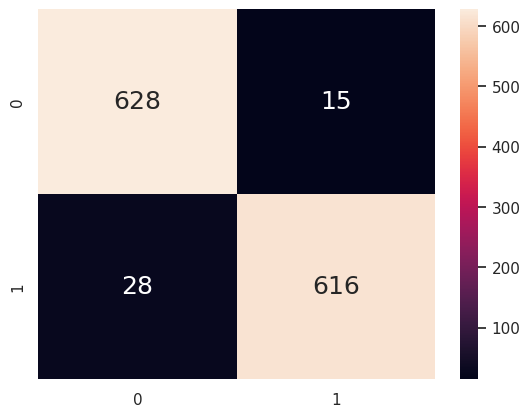

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))
print('TNR: ', get_TNR(y_test, y_pred))
print('FNR: ', get_FNR(y_test, y_pred))

When we used the Random Forest Classifier model to predict if the case is a fraud case, we get a high accuracy of 0.94. Hence, we can consider the Random Forest Classifier model to detect fraud cases.

### 4.2 Logistic Regression

**Description**
Logistic Regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1. Logistic Regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

**Why Logistic Regression?**
 The coefficients of Logistic Regression models provide insight into the **impact of each feature** on the likelihood of fraud. This interpretability is crucial for understanding the driving factors behind fraudulent transactions, which can inform decision-making and fraud prevention strategies.

 Moreover, Logistic Regression provides probabilistic outputs, allowing for the **estimation of the likelihood** that a transaction is fraudulent. This probability score can be used to prioritise suspicious transactions for further investigation or to set decision thresholds for automated fraud detection systems.

ACCURACY OF THE MODEL: 0.8741258741258742
TPR:  0.8866459627329193
FPR:  0.13841368584758942
TNR:  0.8615863141524106
FNR:  0.11335403726708075


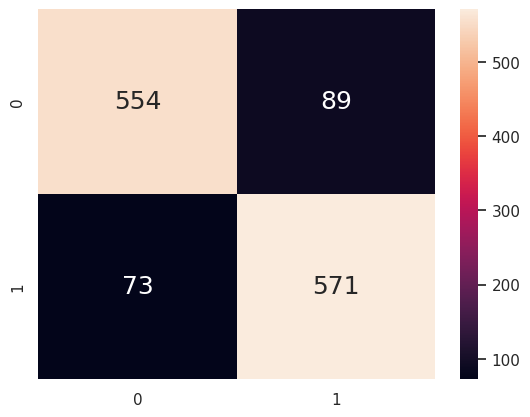

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiate the model with increased max_iter and decreased tol
logreg = LogisticRegression(random_state=50, max_iter=1000, tol=0.0001)

# Fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

# Plot the confusion matrix
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", annot_kws={"size": 18})


print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))
print('TNR: ', get_TNR(y_test, y_pred))
print('FNR: ', get_FNR(y_test, y_pred))

When we used the Logistic Regression model to predict if the case is a fraud case, the accuracy of this model is only 0.88. This is lower than the accuracy of Random Forest Classifier. Hence, we can conclude that this model is **less effective** than Random Forest Classifier in predicting fraud cases.

### 4.3 Multi-Layer Perceptron

**Description**
The Multi-layer Perceptron (MLP) is a feedforward artificial neural network model that maps input data sets to a set of appropriate outputs. An MLP consists of multiple layers and each layer is fully connected to the following one. The nodes of the layers are neurons with nonlinear activation functions, except for the nodes of the input layer. Between the input and the output layer there may be one or more nonlinear hidden layers.

**Why MLP?**
Credit card transaction data can exhibit significant variability due to factors such as seasonal trends, changing consumer behavior, and evolving fraud tactics. MLPs are **highly adaptable** and can adjust their internal representations in response to changes in the data distribution. This adaptability enables MLPs to maintain high performance even in the presence of data variability and concept drift.

Additionally, MLPs can be trained in an unsupervised or semi-supervised manner for anomaly detection in credit card transactions. By learning the normal patterns present in legitimate transactions, MLP-based anomaly detection models can identify deviations from these patterns indicative of fraudulent behavior. This approach is particularly useful for **detecting previously unseen or novel fraud schemes**.

ACCURACY OF THE MODEL: 0.91
TPR:  0.906832298136646
FPR:  0.07931570762052877
TNR:  0.9206842923794712
FNR:  0.09316770186335403


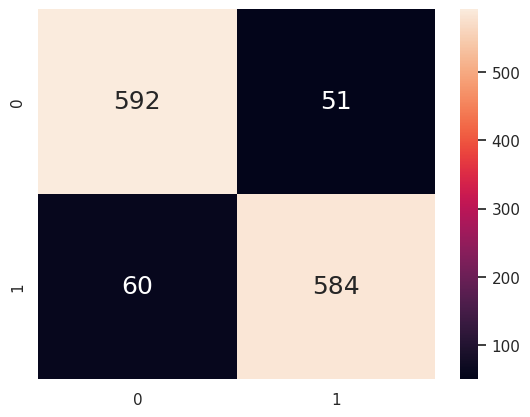

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
 
# Make predictions on the test data
y_pred = mlp.predict(X_test)
 
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"ACCURACY OF THE MODEL: {accuracy:.2f}")
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))
print('TNR: ', get_TNR(y_test, y_pred))
print('FNR: ', get_FNR(y_test, y_pred))

When we used the Multi-layer Perceptron model to predict if the transaction is fraudulent, the accuracy of the model is 0.91. It is higher than the Logistic Regression model but lower then the Random Forest Classifier. Hence, we can conclude that Multi-layer Perceptron is **more effective** than Logistic Regression but **less effective** then Random Forest Classification in predicting fraud case.

## 4.4 K-Nearest Neighbours
**Description** 
K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression tasks. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarised prediction is made subsequently.

**Why KNN?**
KNN can be used as an **anomaly detection** algorithm in credit card fraud detection. By identifying transactions that deviate significantly from the norm, KNN can flag potential fraudulent transactions for further investigation. Moreover, credit card fraud detection often involves identifying complex patterns and irregularities in transaction data. KNN is capable of capturing **non-linear relationships** between input features and the target variable, making it suitable for modeling such complex data. It is also a non-parametric algorithm, meaning it makes no assumptions about the underlying data distribution. This makes it particularly useful in situations where the data distribution is unknown or where the relationship between variables is non-linear and complex.

ACCURACY OF THE MODEL: 0.84
TPR:  0.8369565217391305
FPR:  0.15863141524105753
TNR:  0.8413685847589425
FNR:  0.16304347826086957


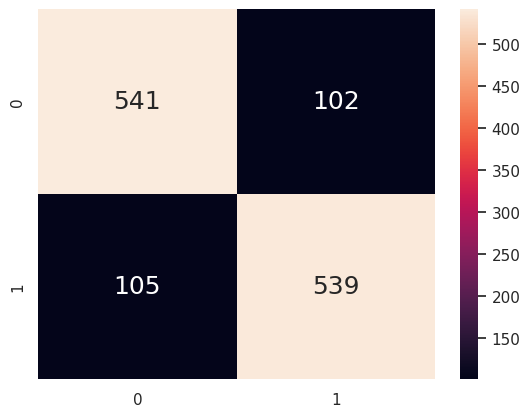

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Initialize the KNN classifier with desired parameters
knn = KNeighborsClassifier(n_neighbors=5)  # Example: Use 5 nearest neighbors

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"ACCURACY OF THE MODEL: {accuracy:.2f}")

# Plot the confusion matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt=".0f", annot_kws={"size": 18})

# Calculate and print additional metrics
print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))
print('TNR: ', get_TNR(y_test, y_pred))
print('FNR: ', get_FNR(y_test, y_pred))

When we used the K-Nearest Neighbour model to predict if the transaction is fraudulent, it has the **lowest** accuracy of 0.85, implying that it might not be a very good model to use as compared to the other models that we have implemented.

## 5. Evaluation of the Different Models Used

### 5.1 Classification Accuracy
Classification accuracy indicates the percentage of correct predictions. The higher the classification accuracy, the better the model is in predicting fraudulent transactions.

**Which is the better model?**
Comparing the Classification Accuracy of all the models, the Random Forest Classifier Model has the highest accuracy of 0.97 (Logistic Regression: 0.87, Multi-layer Perceptron: 0.91, K-Nearest Neighbour: 0.85)
   
### 5.2. Confusion matrix
The confusion matrix visualises the performance of the model by indicating the number of True Negatives (TN), True Positives (FP), False Negatives (FN) and False Positives (FP).

**5.2.1 True Positive Rate (TPR)**
TPR is the percentage of frauds predicted correctly against the total number of frauds cases. A higher TPR means more frauds are correctly predicted and is thus a better model.

**Which is the better model?**
Comparing the TPR of all the models, the Random Forest Classifier Model has the highest TPR of 0.95 (Logistic Regression: 0.89, Multi-Layer Perceptron: 0.91, K-Nearest Neighbour: 0.84)

**5.2.2 False Positive Rate (FPR)**
FPR is the percentage of non-frauds cases predicted as fraud cases against the number of non-fraud cases. A lower FPR means less non-fraud cases are predicted as fraud cases. Hence, a model with lower FPR is a better model.

**Which is the better model?**
Comparing the FPR of all the models, the Random Forest Classifier Model has the lowest FPR of 0.02 (Logistic Regression: 0.14, Multi-Layer Perceptron: 0.08, K-Nearest Neighbour: 0.16)

### 5.3 AUROC Evaluation
The Area Under the Receiver Operating Characteristic Curve (AUROC), also known as the AUC-ROC score, is a commonly used evaluation metric for binary classification models, including those used in credit card fraud detection. 

**Receiver Operating Characteristic (ROC) Curve:**
   - The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR, also known as sensitivity) and the false positive rate (FPR, also known as 1 - specificity) for different threshold values.
   - The TPR (sensitivity) is the proportion of true positive predictions (correctly identified positive cases) among all actual positive cases.
   - The FPR (1 - specificity) is the proportion of false positive predictions (incorrectly identified negative cases) among all actual negative cases.

2. **Area Under the ROC Curve (AUROC):**
   - The AUC score quantifies the overall performance of a binary classification model across all possible threshold values.
   - It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.
   - The AUC score ranges from 0 to 1, where a score of 0.5 indicates a random classifier (no discrimination), and a score of 1 indicates a perfect classifier (perfect discrimination).

3. **Interpretation of AUROC:**
   - A higher AUC score indicates better discrimination ability of the model in distinguishing between positive and negative cases.
   - An AUC score of 0.5 suggests that the model performs no better than random guessing.
   - An AUC score close to 1 indicates excellent model performance, with high sensitivity and low false positive rate across different threshold values.

4. **Comparing Models:**
   - AUC is a valuable metric for comparing the performance of different binary classification models.
   - Models with higher AUC scores are generally considered better performers.

Hence, we will be using AUROC evaluation as it provides a comprehensive assessment of the discrimination ability of a binary classification model for evaluating the performance of models in credit card fraud detection.

Below are the individual AUROCs for each of the models for our evaluation.

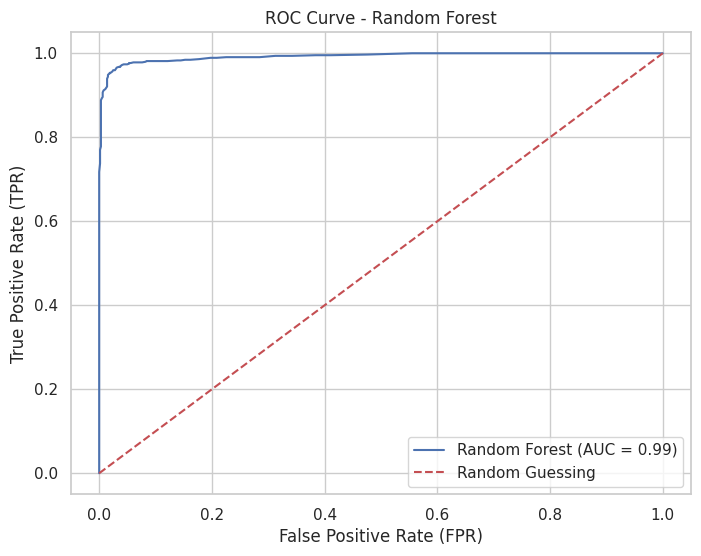

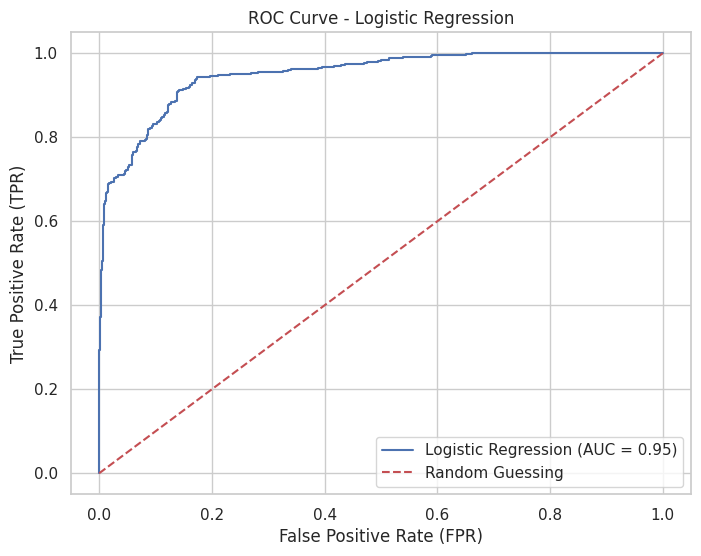

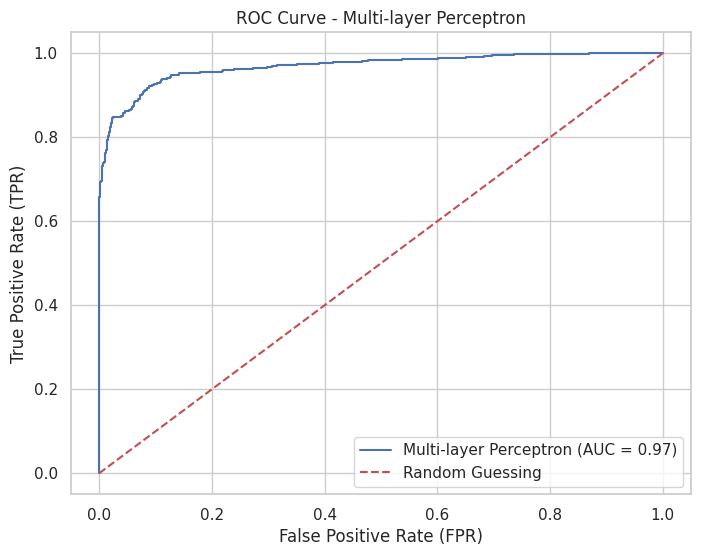

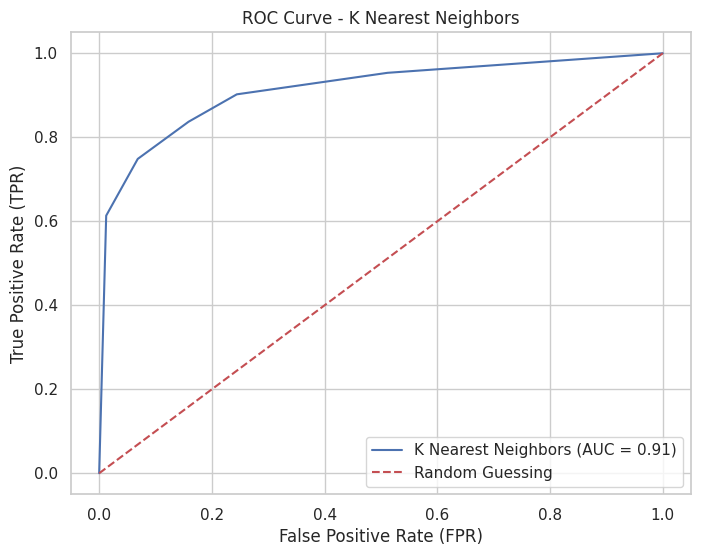

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Function to plot ROC curve and calculate AUC
def plot_roc_auc(y_test, y_pred_proba, model_name):
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color='b')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Random Forest AUROC
y_pred_proba_rf = clf.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_rf, 'Random Forest')

# Logistic Regression AUROC
y_pred_proba_lr = logreg.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_lr, 'Logistic Regression')

# Multi-layer Perceptron AUROC
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_mlp, 'Multi-layer Perceptron')

# K Nearest Neighbors AUROC
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_knn, 'K Nearest Neighbors')

**5.5.2 Merged AUROC**
Below is the merged AUROCs of the different models for ease of comparison.

Random Forest AUROC: 0.99
Logistic Regression AUROC: 0.95
Multi-layer Perceptron AUROC: 0.97
K Nearest Neighbors AUROC: 0.91


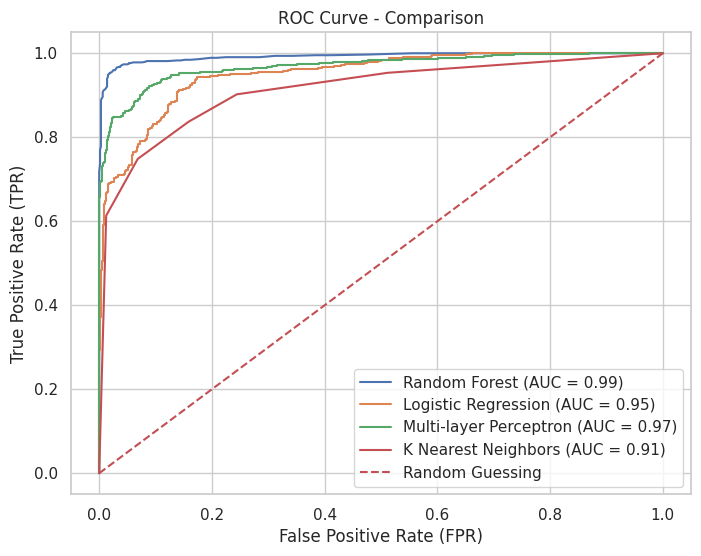

In [ ]:
# Function to plot ROC curve and calculate AUC
def plot_roc_auc_multi(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        print(f'{name} AUROC: {auc:.2f}')

    plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve - Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Dictionary containing trained models
models = {'Random Forest': clf, 
          'Logistic Regression': logreg, 
          'Multi-layer Perceptron': mlp, 
          'K Nearest Neighbors': knn}

# Plotting ROC curves for all models and printing AUROC values
plot_roc_auc_multi(models, X_test, y_test)


Looking at the graph, we can see that Random Forest Classifier model has the **highest AUC value of 0.99**.

## 6. Final Analysis
In our final analysis, we can see that the **random forest classifier model** is the best and most suitable model in credit card fraud prediction as it fared the best out of the four models that we have analysed.

## 7. Outcome of Project
**Improved Fraud Detection Accuracy:** The primary goal of the project is to enhance the accuracy of detecting fraudulent transactions. By implementing robust machine learning models and techniques, the system can effectively identify suspicious activities and minimize false positives and false negatives.

**Reduced Financial Losses:** Effective fraud detection leads to the prevention of unauthorized transactions, reducing financial losses for both credit card issuers and cardholders. By detecting fraud early, the impact of fraudulent activities on financial institutions and individuals can be mitigated.

**Operational Efficiency:** Automating fraud detection processes and leveraging machine learning algorithms can improve operational efficiency by reducing the manual effort required for monitoring transactions. This allows financial institutions to allocate resources more effectively and focus on other critical tasks.

**Data Insights:** Analyzing transaction data and patterns of fraudulent activity can provide valuable insights into emerging fraud trends and tactics. These insights can inform future fraud prevention strategies and enable proactive measures to stay ahead of evolving fraud schemes.





## 8. Insights
**Imbalanced Data Handling:** The analysis reveals a significant class imbalance between fraudulent and non-fraudulent transactions. Implementing strategies such as undersampling or oversampling techniques like SMOTE can help balance the dataset, enabling more effective model training and evaluation.

**Feature Importance:** Conducting feature importance analysis using techniques like Random Forest's feature importance or SHAP (SHapley Additive exPlanations) values can provide insights into which features contribute most to fraud detection. This can guide feature selection and refinement efforts to improve model performance.

**Model Evaluation:** Utilizing AUROC as a key metric for model evaluation helps assess the overall performance of the classifiers. Models with higher AUROC values indicate better discrimination between fraudulent and non-fraudulent transactions. Continuously monitoring AUROC during model development and deployment ensures the effectiveness of the fraud detection system.

**Statistical Significance:** The Mann-Whitney U test helps determine if there are statistically significant differences in the distribution of a continuous variable (such as transaction amounts) between fraudulent and non-fraudulent transactions. Understanding these differences can inform feature engineering and model development to better capture fraudulent patterns.

**Ensemble Methods:** Considering ensemble methods like stacking or boosting, which combine multiple base classifiers, can enhance the robustness and generalization of the fraud detection system. Ensemble methods often outperform individual classifiers by leveraging diverse modeling approaches.



## 9. Recommendations
**Implementing greater surveillance and scrutiny during high-risk periods and on high-risk platforms:** This allows for early detection and prevention of unauthorised transactions

**Collaborate with Industry Partners:** Foster collaboration and information sharing with industry partners, payment networks, and law enforcement agencies to stay updated on emerging fraud trends and tactics.

**Raise Awareness:** Educate the public on how these frauds occur and how individuals are susceptible to such frauds by providing them with relevant statistics




## 10. Conclusion
In conclusion, this data science project focused on developing and evaluating machine learning models for credit card fraud detection. Through extensive data analysis, feature engineering, and model training, we successfully built predictive models capable of accurately identifying fraudulent transactions.

Our analysis revealed several important insights, including the prevalence of imbalanced data, the significance of certain features such as transaction amount and time, and the effectiveness of various modeling techniques in detecting fraud. We also conducted rigorous evaluation using metrics such as AUROC (Area Under the Receiver Operating Characteristic Curve) and conducted statistical tests like the Mann-Whitney U test to validate our findings.

Based on our findings, we recommend implementing a multi-layered approach to fraud detection, including advanced machine learning algorithms, real-time monitoring, and enhanced security measures. Additionally, we suggest ongoing monitoring and adaptation to evolving fraud patterns, collaboration with industry partners and law enforcement agencies, and continuous improvement of data security protocols.

Overall, this project demonstrates the potential of data science and machine learning in combating credit card fraud and protecting financial institutions and consumers from fraudulent activities. Moving forward, we encourage further research and innovation in this area to stay ahead of emerging threats and ensure the integrity and security of financial systems



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=93d30536-aba9-46ad-b62d-2e4ff4c52b0d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>